# Stock Market Analysis 

In [51]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
#from pandas.io.data import DataReader has been replaced by below in python 3
import pandas_datareader as web

# For time stamps
from datetime import datetime



In [4]:
stock_list=['AAPL','GOOG','MSFT','AMZN']

In [45]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [46]:
start = datetime(end.year - 1,end.month,end.day)

In [47]:
print (start.strftime("%Y"))

2018


In [53]:
import pandas_datareader as web
for stock in stock_list:
    globals()[stock]= web.DataReader(stock,'yahoo',start,end)

Note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

In [54]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-24,188.839996,186.210007,188.770004,188.149994,23234000.0,185.328918
2018-05-25,189.649994,187.649994,188.229996,188.580002,17461000.0,185.752487
2018-05-29,188.750000,186.869995,187.600006,187.899994,22514100.0,185.082672
2018-05-30,188.000000,186.779999,187.720001,187.500000,18690500.0,184.688675
2018-05-31,188.229996,186.139999,187.220001,186.869995,27482800.0,184.068115


In [55]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,193.493968,189.677936,191.579802,191.661826,3.235044e+07,189.905902
std,21.542570,21.263672,21.363370,21.389147,1.405595e+07,20.954526
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.039642
25%,175.967499,173.947498,174.872501,174.945000,2.277402e+07,174.273876
50%,191.970001,189.324997,190.695000,190.855003,2.879985e+07,188.411995
75%,210.074997,206.832497,208.305000,208.872498,3.865015e+07,206.713852
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


In [57]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-05-24 to 2019-05-24
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


Let's go ahead and plot out the volume and closing price of the stocks

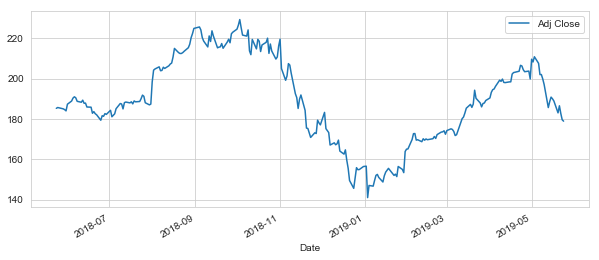

In [62]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

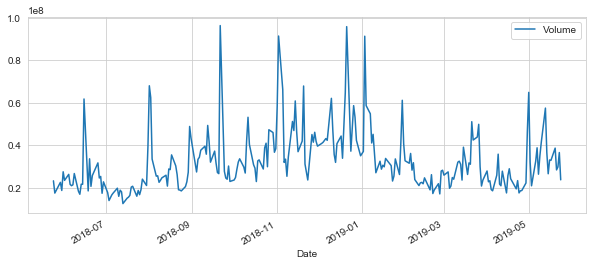

In [60]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [70]:
MArange=[10,20,50,100]
for days in MArange:
    col= "MA for %s days" %(str(days))
    AAPL[col]=AAPL['Adj Close'].rolling(days).mean()

In [71]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']]

,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,
2018-05-24,185.328918,NaN,NaN,NaN
2018-05-25,185.752487,NaN,NaN,NaN
2018-05-29,185.082672,NaN,NaN,NaN
2018-05-30,184.688675,NaN,NaN,NaN
2018-05-31,184.068115,NaN,NaN,NaN
2018-06-01,187.387604,NaN,NaN,NaN
2018-06-04,188.953751,NaN,NaN,NaN
2018-06-05,190.411560,NaN,NaN,NaN
2018-06-06,191.071487,NaN,NaN,NaN


plotting all the additional Moving Averages

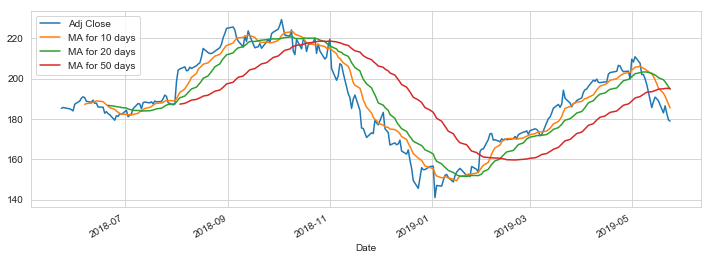

In [72]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,4))

#### Section 2 - Daily Return Analysis

Using pandas to retrieve the daily returns for the Apple stock to take a closer look at the daily changes of the stock, and not just its absolute value so we can analyze risk of the stock.

In [76]:
AAPL['Daily_ret']=AAPL['Adj Close'].pct_change()

In [77]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily_ret
Date,,,,,,,,,,,
2018-05-24,188.839996,186.210007,188.770004,188.149994,23234000.0,185.328918,NaN,NaN,NaN,NaN,NaN
2018-05-25,189.649994,187.649994,188.229996,188.580002,17461000.0,185.752487,NaN,NaN,NaN,NaN,0.002285
2018-05-29,188.750000,186.869995,187.600006,187.899994,22514100.0,185.082672,NaN,NaN,NaN,NaN,-0.003606
2018-05-30,188.000000,186.779999,187.720001,187.500000,18690500.0,184.688675,NaN,NaN,NaN,NaN,-0.002129
2018-05-31,188.229996,186.139999,187.220001,186.869995,27482800.0,184.068115,NaN,NaN,NaN,NaN,-0.003360


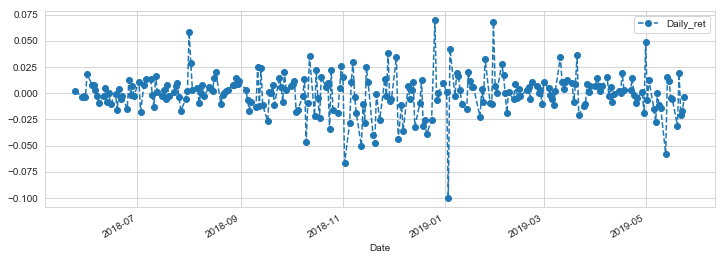

In [85]:
AAPL['Daily_ret'].plot(linestyle='--',marker='o',legend=True,figsize=(12,4))

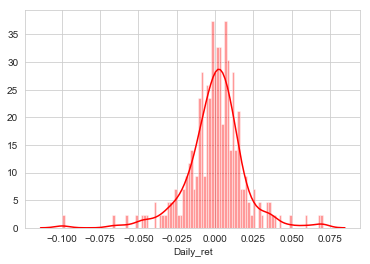

In [90]:
sns.distplot(AAPL['Daily_ret'].dropna(),bins=100,color='red')

In [91]:
closing_df = web.DataReader(stock_list,'yahoo',start,end)['Adj Close']

In [92]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-05-24,185.328918,1603.069946,1079.239990,96.739098
2018-05-25,185.752487,1610.150024,1075.660034,96.788300
2018-05-29,185.082672,1612.869995,1060.319946,96.443893
2018-05-30,184.688675,1624.890015,1067.800049,97.368874
2018-05-31,184.068115,1629.619995,1084.989990,97.260628


In [93]:
returns=closing_df.pct_change()

In [94]:
returns.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-05-24,NaN,NaN,NaN,NaN
2018-05-25,0.002285,0.004417,-0.003317,0.000509
2018-05-29,-0.003606,0.001689,-0.014261,-0.003558
2018-05-30,-0.002129,0.007453,0.007055,0.009591
2018-05-31,-0.003360,0.002911,0.016098,-0.001112


Let's compare the daily percentage return of two stocks to check how correlated.

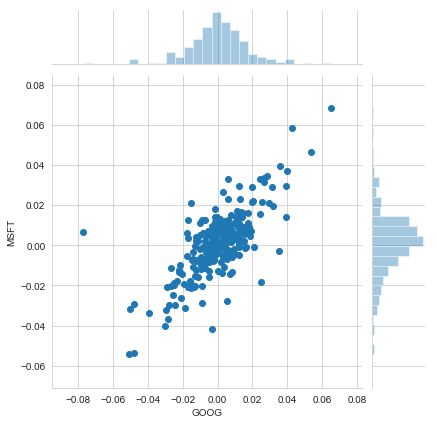

In [102]:
import scipy.stats as stats
sns.jointplot('GOOG','MSFT',returns,kind='scatter')

C:\Users\dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


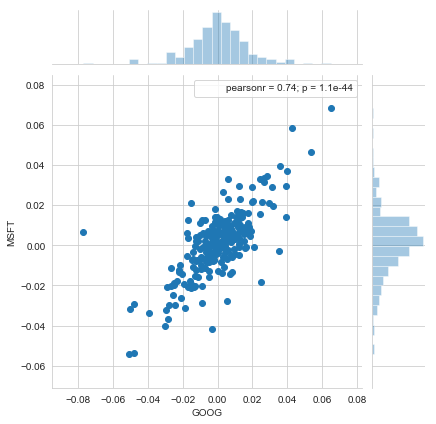

In [97]:
import scipy.stats as stats
reg=sns.jointplot('GOOG','MSFT',returns,kind='scatter')
reg.annotate(stats.pearsonr)
plt.show()

#brought pearson r value to the plot as it was deprecated,also this annotate method will be deprecated

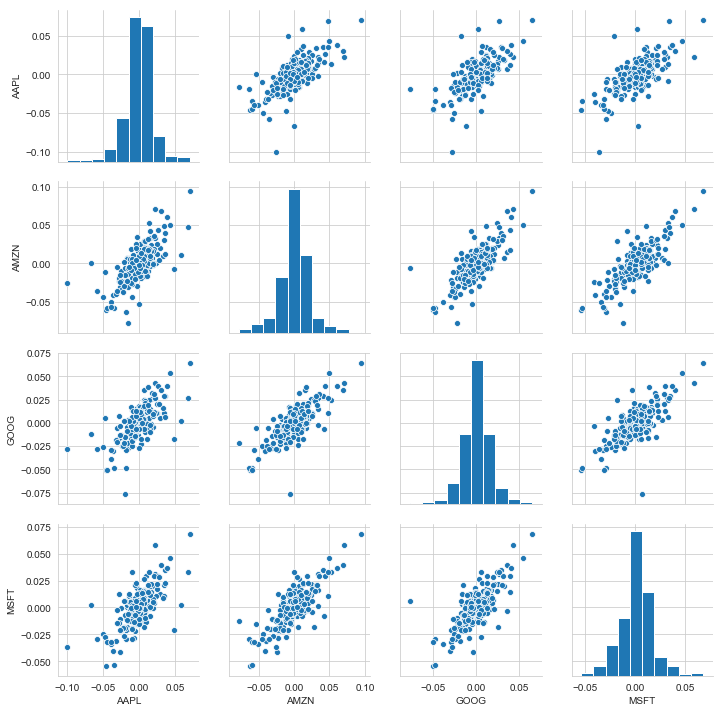

In [104]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(returns.dropna())

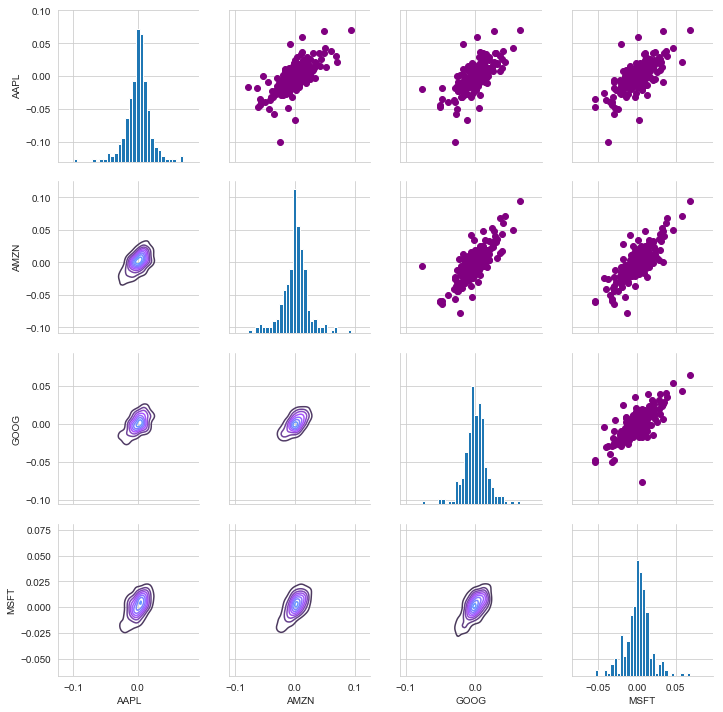

In [111]:
#we can also use sns.PairGrid() for full control of the figure,
#including what kind of plots go in the diagonal, the upper triangle, and the lower triangle
returns_fig= sns.PairGrid(returns.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

1)amazon-microsoft 2) microsoft-google and 3)amaozon-google shows more relation in percentage change

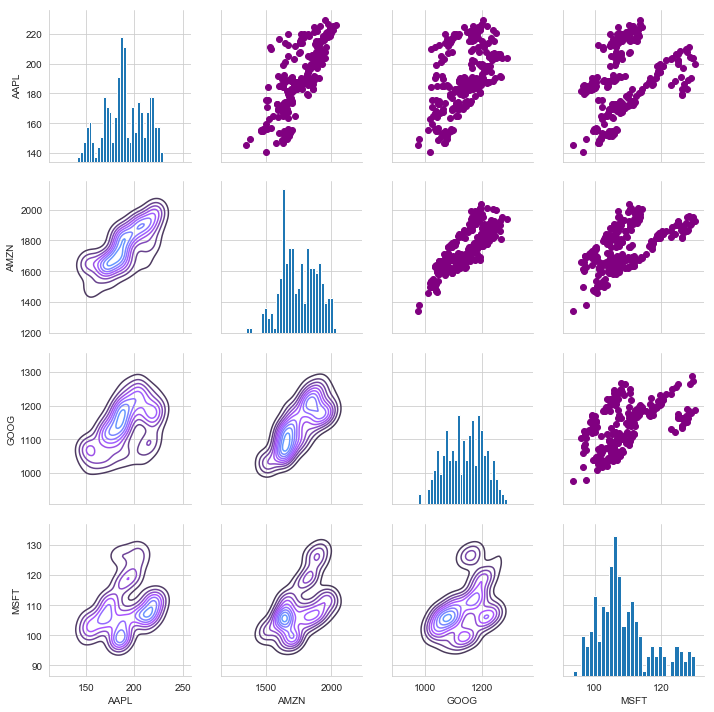

In [112]:
#similarly check for closing prices
returns_fig= sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

Amazon-Google and Amazon-Microsoft shows more relation in closing prices

In [123]:
pct_correlation=returns.dropna().corr()

In [121]:
pct_correlation.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Symbols,,,,
AAPL,1.000000,0.687192,0.652643,0.680656
AMZN,0.687192,1.000000,0.773271,0.792820
GOOG,0.652643,0.773271,1.000000,0.739468
MSFT,0.680656,0.792820,0.739468,1.000000


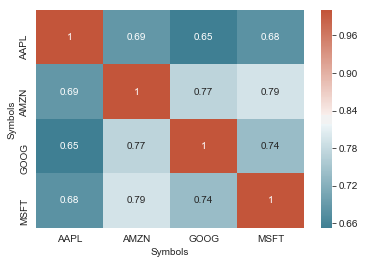

In [124]:
colormap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(pct_correlation,annot=True,cmap=colormap)

In [125]:
close_correlation=closing_df.dropna().corr()

In [126]:
close_correlation.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Symbols,,,,
AAPL,1.000000,0.773365,0.549959,0.336627
AMZN,0.773365,1.000000,0.812554,0.579751
GOOG,0.549959,0.812554,1.000000,0.508110
MSFT,0.336627,0.579751,0.508110,1.000000


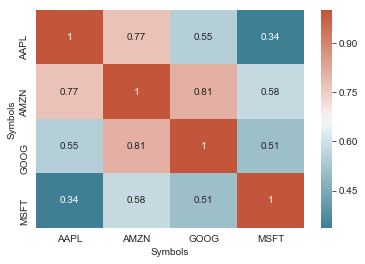

In [127]:
sns.heatmap(close_correlation,annot=True,cmap=colormap)

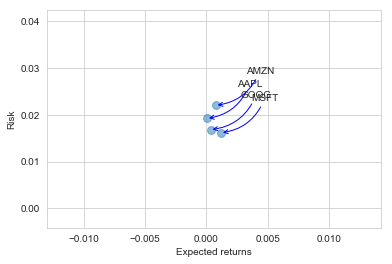

In [138]:
rets = returns.dropna()
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)
#x is mean of percentage change in price
#y is standard deviation of percentage change

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, 30),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        arrowprops = dict(arrowstyle = '->',color='blue' ,connectionstyle = 'arc3,rad=-0.3'))

Microsoft provides higher expected returns with less risk

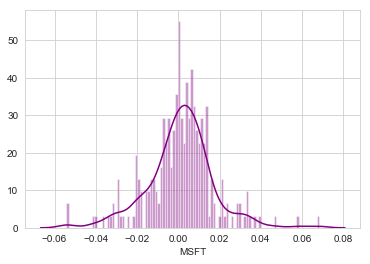

In [140]:
sns.distplot(rets.MSFT,bins=100,color='purple')  #Daily returns plot

In [141]:
# The 0.05 empirical quantile of daily returns
rets['MSFT'].quantile(0.05)

-0.02831979774836163

The 0.05 empirical quantile of daily returns is at -0.028. That means that with 95% confidence, our worst daily loss will not exceed 2.8%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.028 * 1,000,000 = $28,000.

In [142]:
rets['AMZN'].quantile(0.05)

-0.03705071744341626

In [143]:
rets['GOOG'].quantile(0.05)

-0.02617776757926904

In [144]:
rets['AAPL'].quantile(0.05)

-0.031230763109850623

Monte Carlo Simulation:

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link:
http://www.investopedia.com/articles/07/montecarlo.asp


In [145]:
days=365

In [148]:
dt=1/days
# Now let's grab our mu (drift) from the expected return data we got for MSFT
mu = rets.mean()['MSFT']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['MSFT']

In [152]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [147]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-24,98.940002,96.809998,98.730003,98.309998,26649300.0,96.739098
2018-05-25,98.980003,97.860001,98.300003,98.360001,18363900.0,96.788300
2018-05-29,98.879997,97.230003,97.839996,98.010002,28671000.0,96.443893
2018-05-30,99.250000,97.910004,98.309998,98.949997,22158500.0,97.368874
2018-05-31,99.989998,98.610001,99.290001,98.839996,34140900.0,97.260628


Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

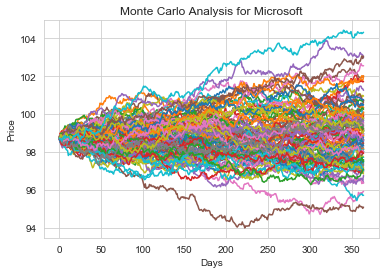

In [154]:
# Get start price from MSFT.head()
start_price = 98.73

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

In [163]:
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];
    #for every simulation there will be 365 values of 365 days
    #here we are running the simulation 10000 times and taking values of the last day using [days-1] and proceeding to plot histogram


In [160]:
z=stock_monte_carlo(start_price,days,mu,sigma)
z

array([ 98.73      ,  98.87679089,  98.92460132,  98.80754006,
        98.83738573,  98.88014824,  98.96457097,  98.93098448,
        98.93414991,  98.90168219,  99.01501799,  98.82695588,
        98.8344141 ,  98.85989368,  98.78809822,  98.86318913,
        98.96383168,  98.88896353,  98.95957794,  98.93350317,
        98.8240763 ,  98.68524259,  98.68858226,  98.80034486,
        98.81073342,  98.79865624,  98.84466252,  98.77363   ,
        98.70619111,  98.74741684,  98.72047785,  98.74797995,
        98.70944328,  98.81454882,  98.81279923,  98.80280028,
        98.70594953,  98.71105954,  98.73782248,  98.70329006,
        98.79510758,  98.89076421,  98.99122316,  99.08117922,
        99.03541733,  98.99819129,  99.09393092,  99.00552164,
        98.94062769,  98.9289935 ,  98.99878637,  99.028923  ,
        99.0433052 ,  98.98555423,  98.89159256,  99.05416419,
        99.14685271,  99.28573927,  99.18266278,  99.28411515,
        99.46611861,  99.4575903 ,  99.46696713,  99.53

In [161]:
z[days-1]

97.85208942077696

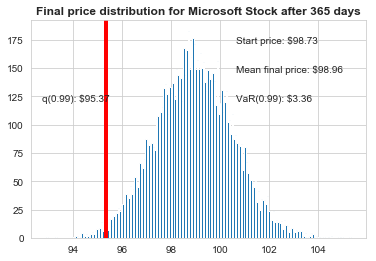

In [164]:

# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Microsoft Stock after %s days" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Microsoft stock, which looks to be $3.36 for every investment of 98.73 (the price of one inital Microsoft stock).

This basically menas for every initial stock you purchase your putting about $3.36 at risk 99% of the time from our Monte Carlo Simulation.

For google:

In [165]:
dt=1/days
# Now let's grab our mu (drift) from the expected return data we got for MSFT
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']


In [166]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-24,1080.469971,1066.150024,1079.000000,1079.239990,766800,1079.239990
2018-05-25,1082.560059,1073.775024,1079.020020,1075.660034,899400,1075.660034
2018-05-29,1073.369995,1055.219971,1064.890015,1060.319946,1865100,1060.319946
2018-05-30,1069.209961,1056.829956,1063.030029,1067.800049,1138500,1067.800049
2018-05-31,1097.189941,1067.560059,1067.560059,1084.989990,3088300,1084.989990


Text(0.5, 1.0, 'Monte Carlo Analysis for GOOGLE')

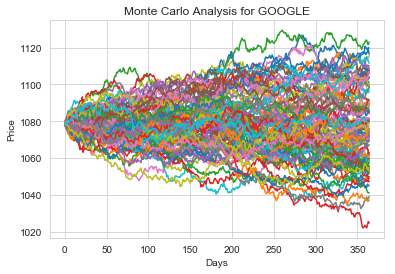

In [181]:
# Get start price from GOOG.head()
start_price = 1079.00

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for GOOGLE')

In [182]:
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];
    #for every simulation there will be 365 values of 365 days
    #here we are running the simulation 10000 times and taking values of the last day using [days-1] and proceeding to plot histogram


In [192]:
def Histsimu(simulations,start_price,days,company):
    # Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
    q = np.percentile(simulations, 1)
    
    # Now let's plot the distribution of the end prices
    plt.hist(simulations,bins=200)
    
    # Using plt.figtext to fill in some additional information onto the plot
    
    # Starting Price
    plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
    
    # Mean ending price
    plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
    
    # Variance of the price (within 99% confidence interval)
    plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
    
    # Display 1% quantile
    plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
    
    # Plot a line at the 1% quantile result
    plt.axvline(x=q, linewidth=4, color='r')
    
    # Title
    plt.title("Final price distribution for {} Stock after {} days".format(company,days), weight='bold');

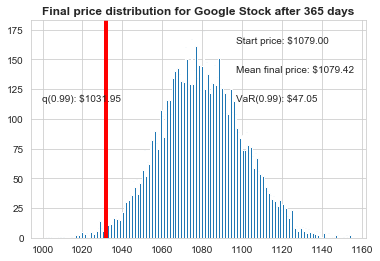

In [194]:
Histsimu(simulations,start_price,days,"Google")

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $47.05 for every investment of 1079 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $47.05 at risk 99% of the time from our Monte Carlo Simulation.

for AAPL:

In [195]:
dt=1/days
# Now let's grab our mu (drift) from the expected return data we got for MSFT
mu = rets.mean()['AAPL']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['AAPL']

In [176]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily_ret
Date,,,,,,,,,,,
2018-05-24,188.839996,186.210007,188.770004,188.149994,23234000.0,185.328918,NaN,NaN,NaN,NaN,NaN
2018-05-25,189.649994,187.649994,188.229996,188.580002,17461000.0,185.752487,NaN,NaN,NaN,NaN,0.002285
2018-05-29,188.750000,186.869995,187.600006,187.899994,22514100.0,185.082672,NaN,NaN,NaN,NaN,-0.003606
2018-05-30,188.000000,186.779999,187.720001,187.500000,18690500.0,184.688675,NaN,NaN,NaN,NaN,-0.002129
2018-05-31,188.229996,186.139999,187.220001,186.869995,27482800.0,184.068115,NaN,NaN,NaN,NaN,-0.003360


Text(0.5, 1.0, 'Monte Carlo Analysis for APPLE')

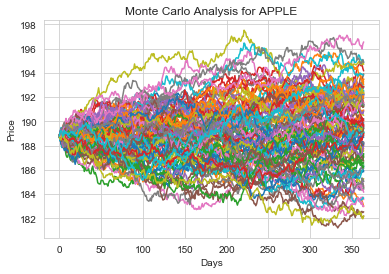

In [196]:
# Get start price from GOOG.head()
start_price = 188.77

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for APPLE')

In [197]:
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];
    #for every simulation there will be 365 values of 365 days
    #here we are running the simulation 10000 times and taking values of the last day using [days-1] and proceeding to plot histogram


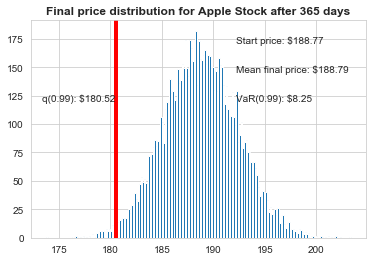

In [198]:
Histsimu(simulations,start_price,days,"Apple")

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $8.25 for every investment of 188.77 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $8.25 at risk 99% of the time from our Monte Carlo Simulation.